In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from pandas.plotting import radviz, parallel_coordinates
import matplotlib.pyplot as plt
from sklearn import metrics
import Orange
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
#from yellowbrick.features import ParallelCoordinates

# BIOLAB DATA SET

In [2]:
#file="biolab.si/lung.tab"
#file="biolab.si/braintumor.tab"
#file="biolab.si/leukemia.tab" # run
#file="biolab.si/MLL.tab" # run
#file="biolab.si/lungGSE1987.tab"
#file="biolab.si/SRBCT.tab"
#file="biolab.si/prostata.tab"
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()

In [72]:
#file="biolab.si/leukemia.tab" # run
#file="biolab.si/MLL.tab" # run
#file="biolab.si/SRBCT.tab" # run
file="biolab.si/lungGSE1987.tab" # run missing
#file="biolab.si/prostata.tab" #run
#file="biolab.si/braintumor.tab" # run
#file="biolab.si/lung.tab"

data=Orange.data.Table(file)
x=data.X
y=data.Y

In [73]:
att=data.domain.attributes
gene_name=[data.domain.attributes[i].name for i in range(len(att)) ]
gene_name[:5]

['100_g_at', '1000_at', '1001_at', '1004_at', '1005_at']

In [74]:
gene=data.domain.class_var.values
gene_class=[data.domain.class_var.values[np.int(i)] for i in y]
np.unique(gene_class)

array(['Adenocarcinoma', 'Normal', 'Squamous'],
      dtype='<U14')

In [75]:
x=pd.DataFrame(x)
x=(x-x.min())/(x.max()-x.min())

In [76]:
x.shape

(34, 10541)

In [79]:
#x=x.fillna(0)
x.isnull().sum().sum()

0

In [78]:
#x=x.dropna(axis='columns')

In [80]:
# Input Y, y
#braintumor	0.8212 
#select=[701,5264,5063,4662,5521,5004,3349,535,1114]
#leukemia	0.9388	 
#select=[1374,1303,3758,20,4968,908,1933,19,4337,1335]
#lung	0.805	 
#select=[229,307,10,688,580,1263,6464,128,5986]
#lungGSE1987	0.9321	 
select=[4434,9215,9441,281,29,3334,3514,8659,65,4030]
#MLL	0.9335	 
#select=[11316,11382,1011,8824,8000,7880,214,4160,3718,11247]
#prostata	0.8628	 
#select=[9025,9748,10366,4297,202,6117,10872,5593,10166]

#SRBCT	0.9257	 
#select=[1612,1954,508,152,254,1883,1605,1612,544]

best_select=select
m=len(select)
anchor=DimensionAnchor(m)

X=x[select].values
Y=circleradviz(X,anchor)

def VizRank(Y,y,K=5):
    c=y.astype(int)
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(Y, c)
    proba=neigh.predict_proba(Y)
    pro=np.zeros(len(c))
    for i in range(len(c)):
        pro[i]=proba[i,c[i]]
    return pro.mean()*100
def ClassificationAccuracy(Y,y,K=5):
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(Y, y)
    return neigh.score(Y,y)*100
#K=np.int(np.sqrt(len(y)))
K=5
print(file[10:])
print('VizRank: ',VizRank(Y,y,K))
print('classification accuracy: ', ClassificationAccuracy(Y,y))
print(best_select)
print([gene_name[i] for i in best_select])

lungGSE1987.tab
VizRank:  100.0
classification accuracy:  100.0
[4434, 9215, 9441, 281, 29, 3334, 3514, 8659, 65, 4030]
['35655_at', '40996_s_at', '41245_at', '1319_at', '1036_at', '34301_r_at', '34530_at', '40392_at', '1079_g_at', '35161_at']


In [9]:
def cradviz(x,alpha):
    #alpha
    m=len(x)
    theta=np.zeros(m)
    for i in range(m):
        theta[i]=alpha[i]#*x[i]+alpha[i,1]*(1-x[i])
    anchor=np.array([np.cos(theta),np.sin(theta)])
    if np.sum(x)!=0.0:
        p=np.dot(anchor,x)/np.sum(x)
    else:
        p=np.zeros(2)
    #p=np.dot(anchor,x) # Star coordinates
    return p

In [10]:
def circleradviz(X,a):
	#p=sum 
	(n,m)=X.shape
	Y=np.zeros((n,2))
	for i in range(n):
		Y[i]=cradviz(X[i],a)
	return Y

In [11]:
def DimensionAnchor(m):
    an=np.zeros(m)
    for i in range(m):
        an[i]=i*np.pi*2/m
    return an

In [21]:
m=9
anchor=DimensionAnchor(m)
best_score=0.0

col=x.columns.values

select=col[range(m)]

#select=[3581, 10604, 11919, 11571, 6117, 11149, 1350, 10166]
#[ 3581, 10604, 11919, 11571,  6117, 11149, 10554, 10166]

#braintumor	0.8212 [701,5264,5063,4662,5521,5004,3349,535,1114]
#leukemia	0.9388	 [1374,1303,3758,20,4968,908,1933,19,4337,1335]
#lung	0.805	 [229,307,10,688,580,1263,6464,128,5986]
#lungGSE1987	0.9321	 [4434,9215,9441,281,29,3334,3514,8659,65,4030]
#MLL	0.9335	 [11316,11382,1011,8824,8000,7880,214,4160,3718,11247]
#prostata	0.8628	 [10166,10604,7554,6117,11750,6117,10177,7228]
#SRBCT	0.9257	 [1612,1954,508,152,254,1883,1605,1612,544]


X=x[select].values
Y=circleradviz(X,anchor)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
#clf.fit(Y,y)
#best_score=clf.score(Y,y)

best_select=select
print(best_score,best_select)

0.0274561302375 [0 1 2 3 4 5 6 7 8]


In [22]:
#m=4
anchor=DimensionAnchor(m)
best_score=0.0
col=x.columns.values
#select=[1335+1,3544+1,1395+1,3993+1,186+1]
select=col[range(m)]
X=x[select].values
Y=circleradviz(X,anchor)
best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 

#clf.fit(Y,y)
#best_score=clf.score(Y,y)

best_select=select
for i in col[m:]:
    select=best_select.copy()
    for j in range(m):
        c_select=select.copy() 
        c_select[j]=i
        X=x[c_select].values
        Y=circleradviz(X,anchor)
        #clf.fit(Y,y)
        #score=clf.score(Y,y)
        
        score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
        if (best_score<score):
            best_score=score
            best_select=c_select#.copy()
            
            
print(best_score,best_select)

0.808082886043 [11874 11897  7584  4297   202  6117  6255  5593 10166]


Score:  0.932166121491


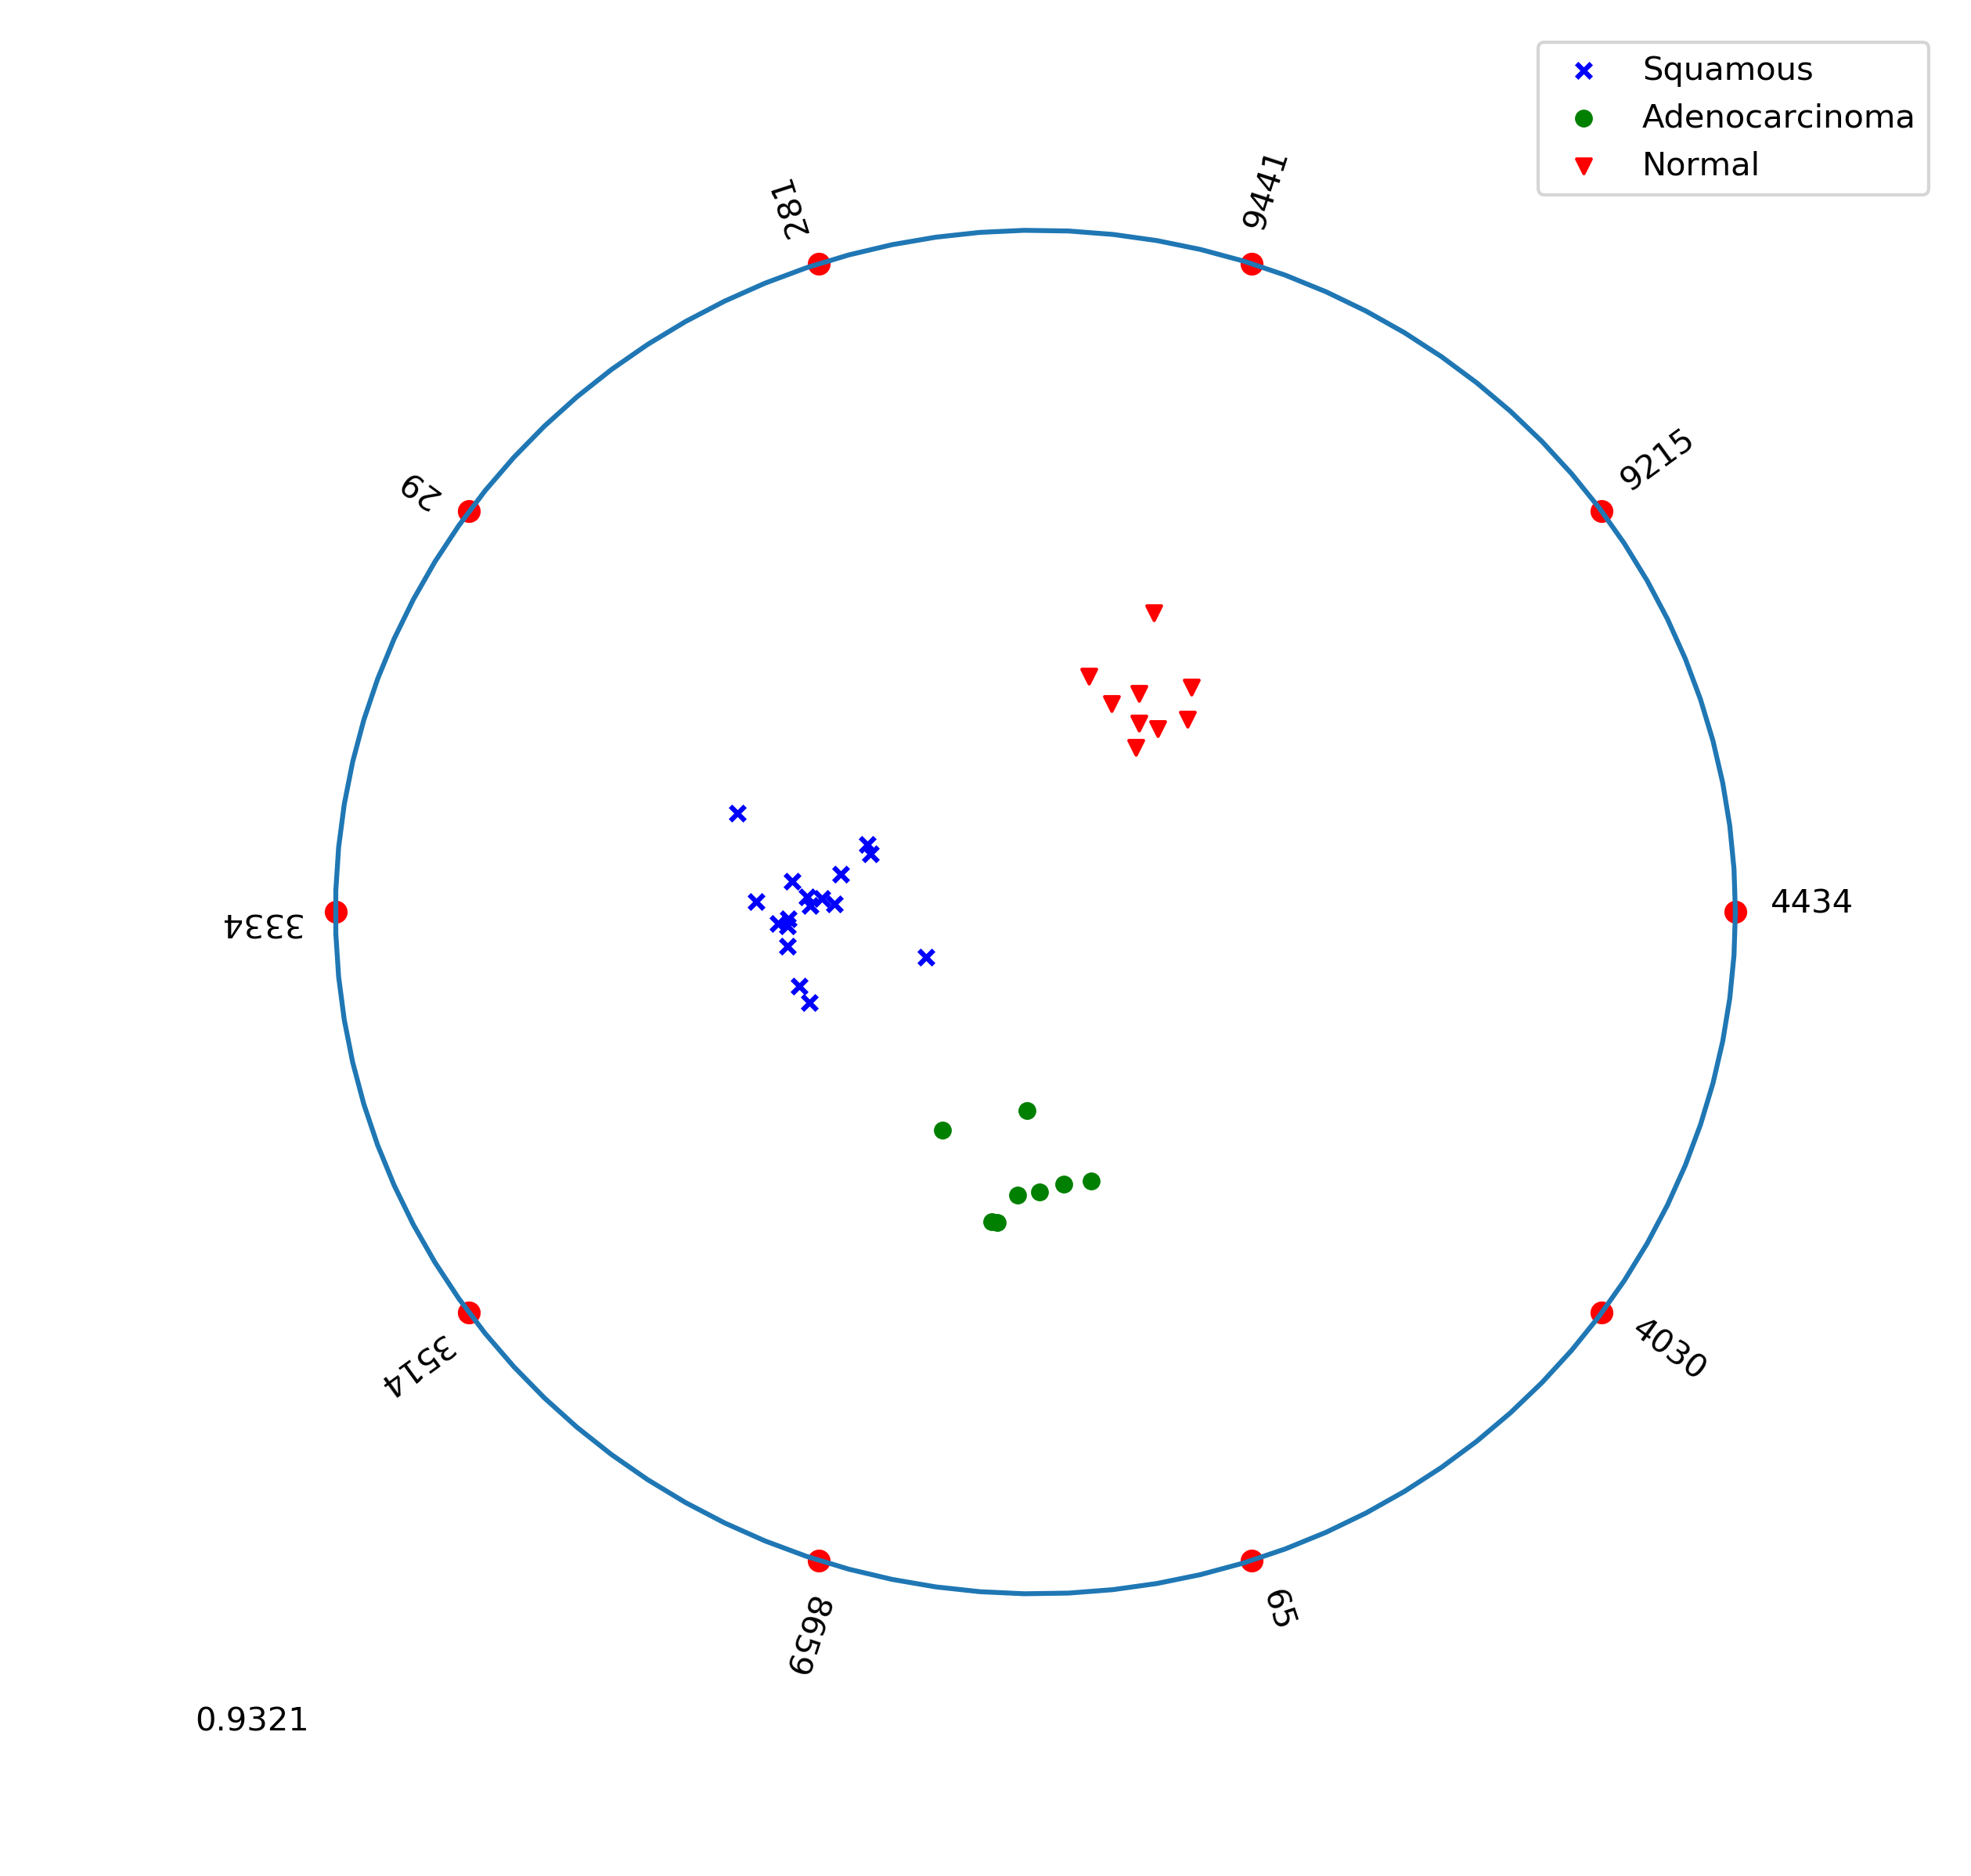

In [81]:
#select=[1767, 1276, 1674, 1375]
select=best_select#[1293, 1556, 4517, 1727, 5058, 1375]
X=x[select].values
Y=circleradviz(X,anchor)

#clf.fit(Y,y)
#best_score=clf.score(Y,y)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']

cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10,10),dpi=300)
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(t),np.sin(t))


for i in range(m):
    al=anchor[i]
    r=1.05
    #plt.text(r*np.cos(al),r*np.sin(al),gene_name[select[i]],rotation=i*360/m,rotation_mode='anchor')
    plt.text(r*np.cos(al),r*np.sin(al),str(select[i]),rotation=i*360/m,rotation_mode='anchor')
    plt.scatter(np.cos(al),np.sin(al),c='r')

#plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='x',s=20)
for g in classes:
    YY=Y[y==g]
    #plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    
plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.text(-1.2,-1.2,str(best_score)[:6])

plt.axis('off')
plt.savefig('tight'+file[10:][:-3]+'png',bbox_inches='tight')
#plt.savefig(str(m)+file[10:][:-3]+'eps')
plt.show()

In [ ]:
#m=8
#anchor=DimensionAnchor(m)
#best_score=0.0
#col=x.columns.values
#select=[1335+1,3544+1,1395+1,3993+1,186+1]
select=best_select#col[range(m)]
X=x[select].values
Y=circleradviz(X,anchor)

#clf.fit(Y,y)
#best_score=clf.score(Y,y)

best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
best_select=select

for i in col[0:]:
    select=best_select.copy()
    if (i not in best_select):
        for j in range(m):
            c_select=select.copy()
            if (c_select[j]!=i):
                c_select[j]=i
                X=x[c_select].values
                Y=circleradviz(X,anchor)
                #clf.fit(Y,y)
                #score=clf.score(Y,y)

                score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
                if (best_score<score):
                    best_score=score
                    best_select=c_select#.copy()
                
print(best_score)
print(best_select)

Score:  0.828074465241


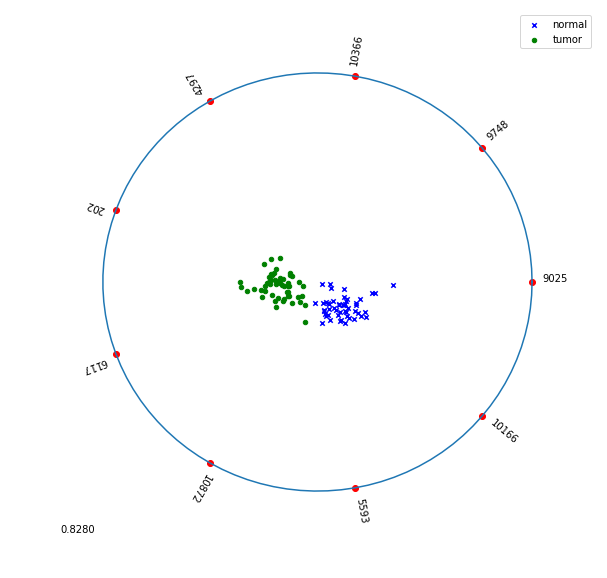

In [26]:
#select=[1767, 1276, 1674, 1375]
select=best_select#[1293, 1556, 4517, 1727, 5058, 1375]
X=x[select].values
Y=circleradviz(X,anchor)

#clf.fit(Y,y)
#best_score=clf.score(Y,y)
best_score=metrics.silhouette_score(Y, y, metric='sqeuclidean') 
print('Score: ', best_score)

# define color
classes=np.unique(y)
#colors=plt.cm.rainbow(np.linspace(0,1,len(classes)))
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10,10))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)

plt.plot(np.cos(t),np.sin(t))


for i in range(m):
    al=anchor[i]
    r=1.05
    #plt.text(r*np.cos(al),r*np.sin(al),gene_name[select[i]],rotation=i*360/m,rotation_mode='anchor')
    plt.text(r*np.cos(al),r*np.sin(al),str(select[i]),rotation=i*360/m,rotation_mode='anchor')
    plt.scatter(np.cos(al),np.sin(al),c='r')

#plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='x',s=20)
for g in classes:
    YY=Y[y==g]
    plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])
    
plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.text(-1.2,-1.2,str(best_score)[:6])

plt.axis('off')
#plt.savefig('NC'+str(m)+file[10:][:-3]+'png')
plt.savefig(str(m)+file[10:][:-3]+'png')
plt.show()

In [20]:
# Input Y, y
#braintumor	0.8212 
#select=[701,5264,5063,4662,5521,5004,3349,535,1114]
#leukemia	0.9388	 
#select=[1374,1303,3758,20,4968,908,1933,19,4337,1335]
#lung	0.805	 
#select=[229,307,10,688,580,1263,6464,128,5986]
#lungGSE1987	0.9321	 
#select=[4434,9215,9441,281,29,3334,3514,8659,65,4030]
#MLL	0.9335	 
#select=[11316,11382,1011,8824,8000,7880,214,4160,3718,11247]
#prostata	0.8628	 
#select=[10166,10604,7554,6117,11750,6117,10177,7228]
#SRBCT	0.9257	 
#select=[1612,1954,508,152,254,1883,1605,1612,544]

m=len(select)
anchor=DimensionAnchor(m)

X=x[select].values
Y=circleradviz(X,anchor)

def VizRank(Y,y,K=5):
    c=y.astype(int)
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(Y, c)
    proba=neigh.predict_proba(Y)
    pro=np.zeros(len(c))
    for i in range(len(c)):
        pro[i]=proba[i,c[i]]
    return pro.mean()*100
def ClassificationAccuracy(Y,y,K=5):
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(Y, y)
    return neigh.score(Y,y)*100
#K=np.int(np.sqrt(len(y)))
K=5
print('VizRank: ',VizRank(Y,y,K))
print('classification accuracy: ', ClassificationAccuracy(Y,y))

VizRank:  67.6470588235
classification accuracy:  80.3921568627


In [16]:
m=10
anchor=DimensionAnchor(m)
best_score=0.0

col=x.columns.values
select=col[range(m)]
X=x[select].values
Y=circleradviz(X,anchor)
clf.fit(Y,y)
best_score=clf.score(Y,y)
best_select=select

#print(best_score,best_select)
##### 
stop=0
c=0
while (stop==0):
    fmax=best_score
    c=c+1
    print(c,": ",fmax)
    for i in col[0:]:
        select=best_select.copy()
        if (i not in best_select):
            for j in range(m):
                c_select=select.copy()
                c_select[j]=i
                X=x[c_select].values
                Y=circleradviz(X,anchor)
                clf.fit(Y,y)
                score=clf.score(Y,y)
                if (best_score<score):
                    best_score=score
                    best_select=c_select#.copy()
                    
    if (best_score==fmax):
        stop=1            
                    
#print(best_score)
print(best_score,best_select)

1 :  0.637254901961
2 :  0.980392156863
0.980392156863 [  23 6117    2 6237 4089 6125  201 3992 4020  217]


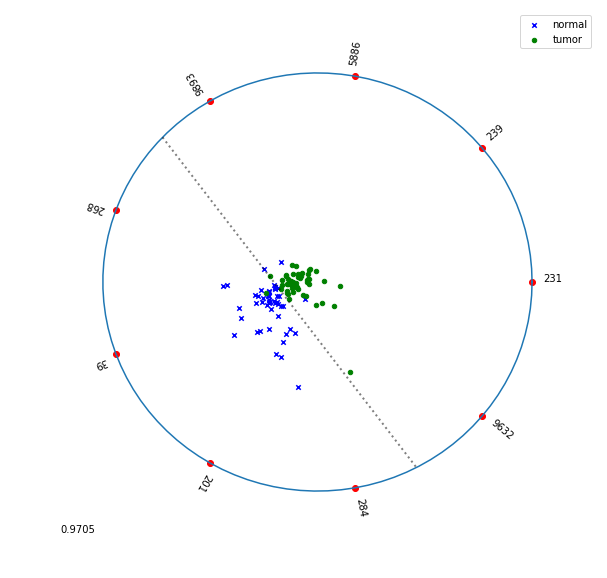

In [15]:
#0.875 [ 303   14  284    3    8 7104   37   63]
select=best_select#[1293, 1556, 4517, 1727, 5058, 1375]
X=x[select].values
Y=circleradviz(X,anchor)
classes=np.unique(y)
points=np.zeros((len(classes),2))
for i in range(len(classes)):
    g=classes[i]
    points[i]=Y[y==g].mean(axis=0)
line=get_line_regions(points)


clf.fit(Y,y)
best_score=clf.score(Y,y)
#print('Score: ', best_score)

# define color
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
markers=['x','o','v','^','>','<','s','p','h']
cm = matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(10,10))
cy=pd.factorize(y)[0]
t=np.linspace(0,2*np.pi,100)

plt.plot(np.cos(t),np.sin(t))


for i in range(m):
    al=anchor[i]
    r=1.05
    #plt.text(r*np.cos(al),r*np.sin(al),gene_name[select[i]],rotation=i*360/m,rotation_mode='anchor')
    plt.text(r*np.cos(al),r*np.sin(al),str(select[i]),rotation=i*360/m,rotation_mode='anchor')
    plt.scatter(np.cos(al),np.sin(al),c='r')

#plt.scatter(Y[:,0],Y[:,1],c=y,cmap=cm,marker='x',s=20)
for g in classes:
    YY=Y[y==g]
    plt.scatter(YY[:,0],YY[:,1],c=colors[np.int(g)],marker=markers[np.int(g)],s=20,label=gene[np.int(g)])

# plot line regions
for l in line:
    plt.plot([l[0][0],l[1][0]],[l[0][1],l[1][1]],linestyle=':', color='k', linewidth=2,alpha=0.5)
    
plt.legend()

plt.xlim(-1.3,1.3)
plt.ylim(-1.3,1.3)

plt.text(-1.2,-1.2,str(best_score)[:6])

plt.axis('off')
plt.savefig('NC'+str(m)+file[10:][:-3]+'png')

plt.show()


C:\Users\tvlon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


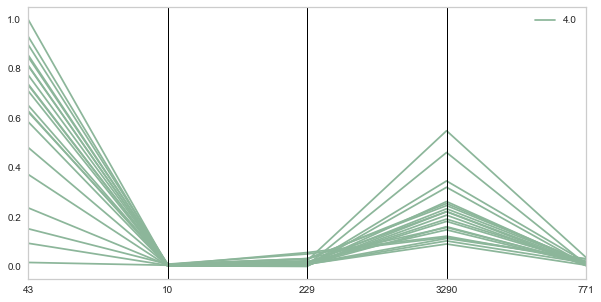

In [87]:
select=best_select
df=x[select]
df['Name']=y

plt.figure(figsize=(10,5))
parallel_coordinates(df[df['Name']==4.0],'Name')
plt.show()

In [ ]:
>>> visualizer = ParallelCoordinates()
    >>> visualizer.fit(X, y)
    >>> visualizer.transform(X)
    >>> visualizer.poof()

In [13]:
from scipy.spatial import Voronoi, voronoi_plot_2d
def intersect_circle(x0,y0,a,b):
    delta=(a*x0+b*y0)*(a*x0+b*y0)+(a*a+b*b)*(1-x0*x0-y0*y0)
    t=(-(a*x0+b*y0)+np.sqrt(delta))/(a*a+b*b)
    x1=x0+t*a
    y1=y0+t*b
    return [(x0,y0),(x1,y1)]

def get_solid_line(vor):
    line_segments = []
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            line_segments.append([(x, y) for x, y in vor.vertices[simplex]])
    return line_segments

def get_dash_line(vor):
    line_segments = []
    center = vor.points.mean(axis=0)
    ptp_bound = vor.points.ptp(axis=0)
    for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
        simplex = np.asarray(simplex)
        if np.any(simplex < 0):
            i = simplex[simplex >= 0][0]  # finite end Voronoi vertex

            t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[pointidx].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[i] + direction * ptp_bound.max()

            line_segments.append([(vor.vertices[i, 0], vor.vertices[i, 1]),
                                  (far_point[0], far_point[1])])
    return line_segments

In [165]:
points.mean(axis=0)[0],points.mean(axis=0)[1],points[0,0]

(-0.099289658005904835, -0.19153423881544274, 0.055487332316906723)

In [12]:
def get_line_regions(points):
    n=len(points)
    if n==2:
        x0=points.mean(axis=0)[0]
        y0=points.mean(axis=0)[1]
        b=points[1,0]-points[0,0]
        a=-(points[1,1]-points[0,1])
        delta=(a*x0+b*y0)*(a*x0+b*y0)+(a*a+b*b)*(1-x0*x0-y0*y0)
        t1=(-(a*x0+b*y0)+np.sqrt(delta))/(a*a+b*b)
        x1=x0+t1*a
        y1=y0+t1*b
        t2=(-(a*x0+b*y0)-np.sqrt(delta))/(a*a+b*b)
        x2=x0+t2*a
        y2=y0+t2*b
        line=[[(x1,y1),(x2,y2)]]
    else:
        vor = Voronoi(points)
        line_dash=get_dash_line(vor)
        line_solid=get_solid_line(vor)
        line=line_solid
        for l in line_dash:
            x1=l[0][0]
            y1=l[0][1]
            x2=l[1][0]
            y2=l[1][1]
            li=intersect_circle(x1,y1,x2-x1,y2-y1)
            line.append([(li[0][0],li[0][1]),(li[1][0],li[1][1])])
    return line

In [132]:
len(points)

3